In [1]:
# Dataset: SMSSpamCollection
# Location: https://mitu.co.in/dataset

In [2]:
import pandas as pd

### import the dataset

In [4]:
df = pd.read_csv('SMSSpamCollection', sep = '\t',
                names=['label','text'])

In [5]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.shape

(5572, 2)

### Seperate the input and output data

In [8]:
# input 
x = df['text']

# output
y = df['label']

In [9]:
import seaborn as sns

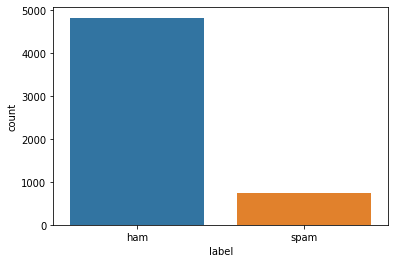

In [10]:
sns.countplot(x = y);

In [11]:
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Data Preparation, Data Cleaning

In [13]:
# 1. Remove the punctuation symbols
# 2. Remove the stopwords
# 3. Remove the stems

In [14]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [15]:
sent = 'Hello friends! How are you. Welcome to Pune.'

In [16]:
tokens = word_tokenize(sent)

In [17]:
tokens

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '.',
 'Welcome',
 'to',
 'Pune',
 '.']

In [22]:
clean1 = [x.lower() for x in tokens if x.isalpha() or x.isdigit()]

In [23]:
clean1

['hello', 'friends', 'how', 'are', 'you', 'welcome', 'to', 'pune']

In [24]:
swords = stopwords.words('english')

In [25]:
clean2 = [x for x in clean1 if x not in swords]

In [26]:
clean2

['hello', 'friends', 'welcome', 'pune']

In [27]:
ps = PorterStemmer()

In [28]:
clean3 = [ps.stem(x) for x in clean2]

In [29]:
clean3

['hello', 'friend', 'welcom', 'pune']

In [30]:
def clean_text(sent):
    tokens = word_tokenize(sent)
    clean1 = [x.lower() for x in tokens if x.isalpha() or x.isdigit()]
    clean2 = [x for x in clean1 if x not in swords]
    clean3 = [ps.stem(x) for x in clean2]
    return clean3

In [31]:
clean_text(sent)

['hello', 'friend', 'welcom', 'pune']

In [33]:
x.apply(lambda a: clean_text(a))

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, 2, contact, u, pound, prize, 2, cl...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

### TF*IDF Vectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [37]:
x_vect = tfidf.fit_transform(x)

In [38]:
x_vect

<5572x6429 sparse matrix of type '<class 'numpy.float64'>'
	with 46502 stored elements in Compressed Sparse Row format>

In [39]:
pd.DataFrame(x_vect)

,0
0,"(0, 6121)\t0.1865677565026138\n (0, 686)\t0..."
1,"(0, 4084)\t0.5514643620986254\n (0, 5889)\t..."
2,"(0, 754)\t0.17606189161034486\n (0, 1247)\t..."
3,"(0, 663)\t0.2877362015312696\n (0, 2868)\t0..."
4,"(0, 5679)\t0.38520136747877337\n (0, 791)\t..."
...,...
5567,"(0, 128)\t0.4399593136391355\n (0, 2010)\t0..."
5568,"(0, 2134)\t0.5692865309624537\n (0, 2413)\t..."
5569,"(0, 4322)\t0.6374814122151056\n (0, 3773)\t..."
5570,"(0, 1059)\t0.3546749465287117\n (0, 555)\t0..."


In [40]:
tfidf.get_feature_names_out()

array(['0', '008704050406', '0089', ..., 'zyada', 'é', 'ü'], dtype=object)

In [41]:
len(tfidf.get_feature_names_out())

6429

### Cross-validation

In [43]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(
    x_vect, y, random_state=0, stratify=y)

In [52]:
x_train.shape

(4179, 6429)

In [53]:
x_test.shape

(1393, 6429)

### Build the Machine Learning Model

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
clf = RandomForestClassifier(random_state=0)

In [56]:
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

### Prediction on unseen / test data

In [58]:
y_pred = clf.predict(x_test)

In [59]:
from sklearn.metrics import classification_report, accuracy_score

In [61]:
accuracy_score(y_test, y_pred)

0.968413496051687

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1206
        spam       0.99      0.78      0.87       187

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393



In [63]:
# Download a sample.csv file for prediction
# Location: https://mitu.co.in

In [77]:
new = pd.read_csv('sample.csv', sep='\t',
                 names = ['text'])

In [78]:
new

,text
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [79]:
new = tfidf.transform(new['text'])

In [80]:
new.shape

(3, 6429)

In [81]:
clf.predict(new)

array(['ham', 'spam', 'ham'], dtype=object)